## Import Modules

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import random
import torch.utils.data as Data
from sklearn.preprocessing import StandardScaler
import math
from torch import nn
from torch.nn import init
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.animation import FuncAnimation, writers

## Data preprocess

In [2]:
std = StandardScaler()

df = pd.read_csv('dataset.csv', index_col=0).to_numpy()

EPOCH = 100
#input data
x_array = df[:, 0:2]
y_array = df[:, 2:4]

#standarization
x_std = std.fit_transform(x_array)
x_torch = torch.from_numpy(x_std)

#produce label
y_torch = torch.from_numpy(y_array)

## Split dataset

In [3]:
dataset = Data.TensorDataset(x_torch,y_torch)
train, test = torch.utils.data.random_split(dataset, [10000, 1000])
train_loader = Data.DataLoader(train, batch_size=150, shuffle = True,)
test_loader = Data.DataLoader(test, batch_size=150, shuffle = True,)

## Build model

In [4]:
class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		self.fc1 = nn.Linear(2, 48)
		#self.fc1_bn = nn.BatchNorm1d(32)
		self.fc2 = nn.Linear(48, 48)
		#self.fc2_bn = nn.BatchNorm1d(64)
		self.fc3 = nn.Linear(48, 48)
		#self.fc3_bn = nn.BatchNorm1d(32)
		self.fc4 = nn.Linear(48, 2)

	def forward(self, x):
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = F.relu(self.fc3(x))
		x = self.fc4(x)
		return x

In [5]:
## Setting Optimizer & Loss function

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)
opt = torch.optim.Adam(net.parameters(), lr = 0.01, weight_decay=0.01)
loss_func = torch.nn.MSELoss()
lost_list = []

## Define train and test process

In [7]:
def train():
	#net.train()
	for x, label in train_loader :
		x = x.to(device)
		label = label.to(device)
		opt.zero_grad()
		loss_func(net(x.float()), label.float()).backward()
		opt.step()

def test(epoch):
	net.eval()
	train_loss = 0
	test_loss = 0
	predict_list = np.zeros((1,2))
	label_list = np.zeros((1,2))

	for train_x, train_y in train_loader :
		train_x = train_x.to(device)
		train_y = train_y.to(device)
		train_predict = net(train_x.float())
		train_loss = train_loss + loss_func(train_predict, train_y.float())
	train_loss = train_loss / len(train_loader)

	for test_x, test_y in test_loader:
		test_x = test_x.to(device)
		test_y = test_y.to(device)
		test_predict = net(test_x.float())
		test_loss = test_loss+loss_func(test_predict, test_y.float())
		predict = test_predict.cpu().detach().numpy()
		predict_list = np.row_stack((predict_list, predict))
		test_label = test_y.cpu().numpy()
		label_list = np.row_stack((label_list, test_label))
	test_loss = test_loss/len(test_loader)

	return train_loss, test_loss, predict_list, label_list

In [8]:
if __name__ == '__main__':
	train_loss_list = []
	test_loss_list = []
	h_loss_list = []
	d_loss_list = []	
	epoch_list = []
	predict_list = []
	label_list = []
	h_r_list = []
	d_r_list = []
	plt.ion()

## Record information in each Epoch and visualize

Epoch : 001, Train_loss : 171.3694, Test_height_loss : 99.8656, Test_distance_loss : 238.6857,Total_test_loss : 169.9647, Height_correlation : 0.9415, Distance_correlation : 0.9682


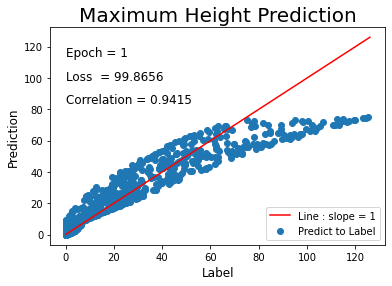

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

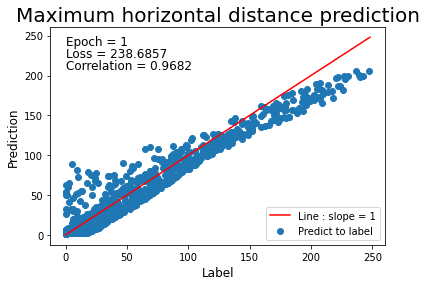

Epoch : 010, Train_loss : 0.5585, Test_height_loss : 0.2300, Test_distance_loss : 1.0145,Total_test_loss : 0.6189, Height_correlation : 0.9998, Distance_correlation : 0.9999


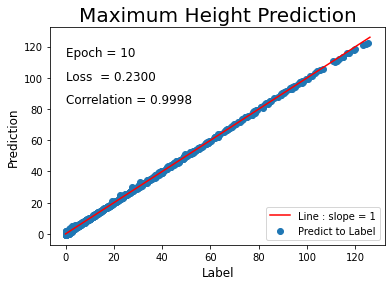

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

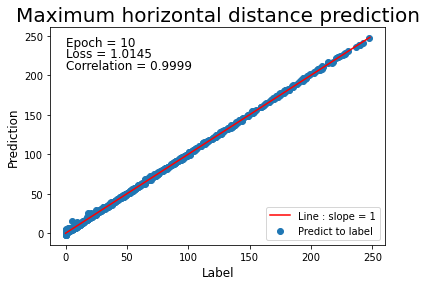

Epoch : 020, Train_loss : 0.3567, Test_height_loss : 0.1712, Test_distance_loss : 0.5282,Total_test_loss : 0.3528, Height_correlation : 0.9999, Distance_correlation : 0.9999


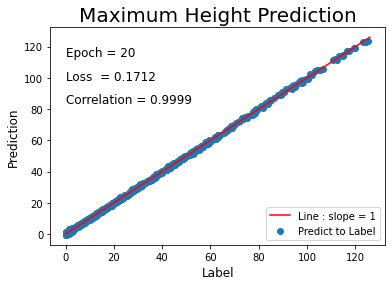

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

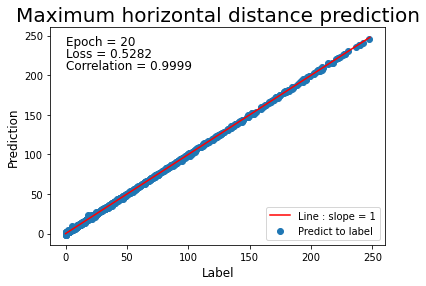

Epoch : 030, Train_loss : 0.4793, Test_height_loss : 0.4288, Test_distance_loss : 0.5594,Total_test_loss : 0.4910, Height_correlation : 0.9999, Distance_correlation : 0.9999


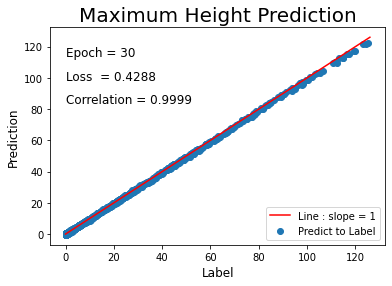

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

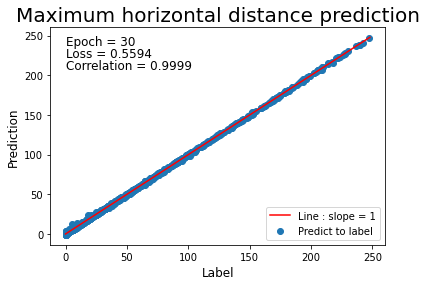

Epoch : 040, Train_loss : 0.1968, Test_height_loss : 0.0785, Test_distance_loss : 0.3578,Total_test_loss : 0.2167, Height_correlation : 0.9999, Distance_correlation : 0.9999


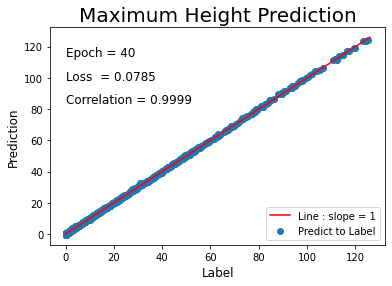

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

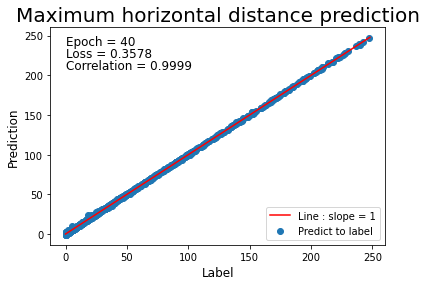

Epoch : 050, Train_loss : 0.2339, Test_height_loss : 0.0756, Test_distance_loss : 0.4338,Total_test_loss : 0.2536, Height_correlation : 1.0000, Distance_correlation : 1.0000


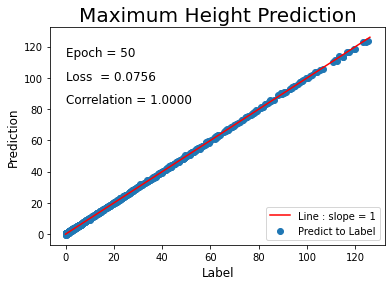

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

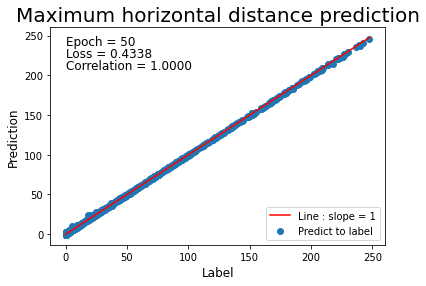

Epoch : 060, Train_loss : 0.1716, Test_height_loss : 0.0607, Test_distance_loss : 0.3968,Total_test_loss : 0.2301, Height_correlation : 1.0000, Distance_correlation : 0.9999


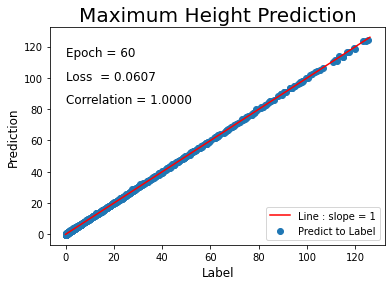

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

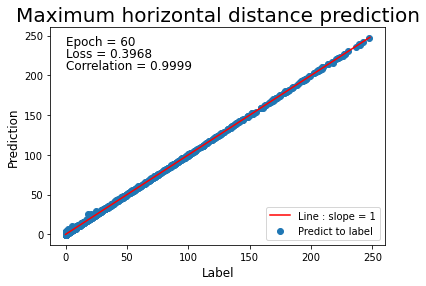

Epoch : 070, Train_loss : 0.2222, Test_height_loss : 0.1829, Test_distance_loss : 0.3029,Total_test_loss : 0.2408, Height_correlation : 1.0000, Distance_correlation : 1.0000


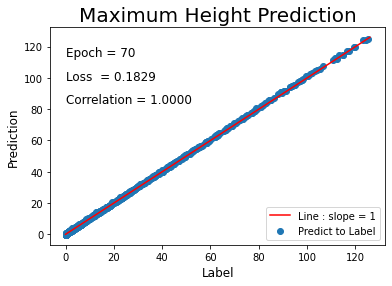

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

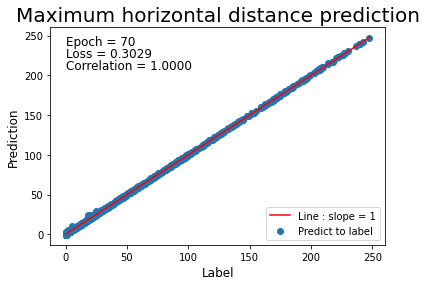

Epoch : 080, Train_loss : 0.1716, Test_height_loss : 0.0909, Test_distance_loss : 0.2658,Total_test_loss : 0.1777, Height_correlation : 1.0000, Distance_correlation : 1.0000


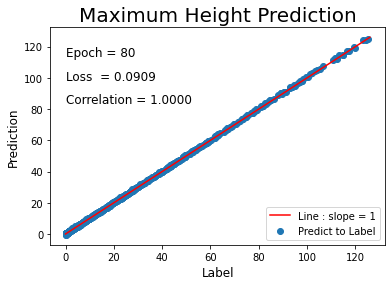

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

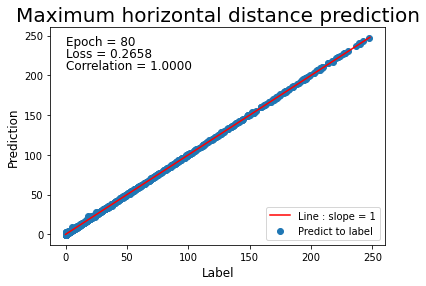

Epoch : 090, Train_loss : 0.2234, Test_height_loss : 0.1243, Test_distance_loss : 0.3188,Total_test_loss : 0.2211, Height_correlation : 1.0000, Distance_correlation : 1.0000


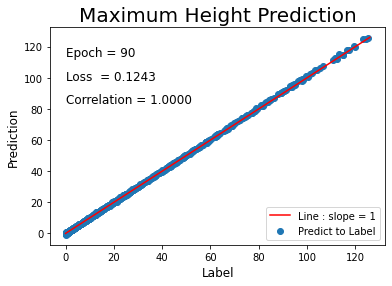

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

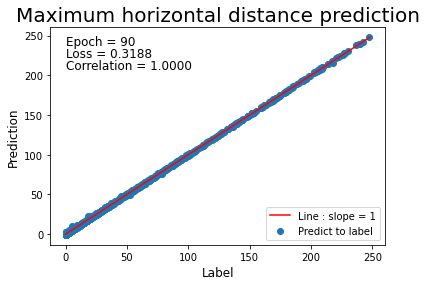

Epoch : 100, Train_loss : 0.1632, Test_height_loss : 0.0476, Test_distance_loss : 0.2939,Total_test_loss : 0.1749, Height_correlation : 1.0000, Distance_correlation : 1.0000


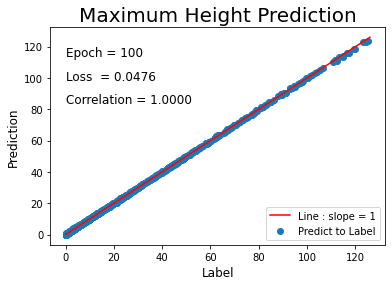

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

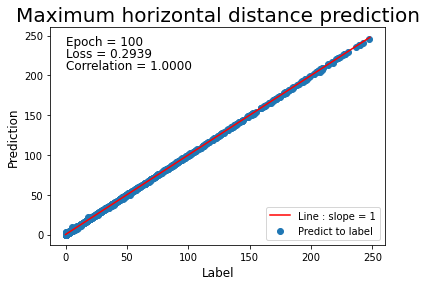

<Figure size 432x288 with 0 Axes>

In [9]:
	for epoch in range(EPOCH) :
		train()
		train_loss, test_loss, predict, label = test(epoch)
		predict = np.delete(predict, 0, axis = 0)
		label = np.delete(label, 0, axis = 0)
		h_loss = mean_squared_error(label[:,0],predict[:,0])
		d_loss = mean_squared_error(label[:,1],predict[:,1])
		#for picture
		train_loss_list.append(train_loss)
		test_loss_list.append(test_loss)
		h_loss_list.append(h_loss)
		d_loss_list.append(d_loss)
		epoch_list.append(epoch)

		fig1 = plt.figure(1)
		fig2 = plt.figure(2)

		if (epoch + 1) % 10 == 0 or epoch == 0 :

			h_r = stats.pearsonr(label[:,0], predict[:,0])[0]
			d_r = stats.pearsonr(label[:,1], predict[:,1])[0]
			log = 'Epoch : {:03d}, Train_loss : {:.4f}, Test_height_loss : {:.4f}, Test_distance_loss : {:.4f},Total_test_loss : {:.4f}, Height_correlation : {:.4f}, Distance_correlation : {:.4f}'
			print(log.format(epoch + 1, train_loss, h_loss, d_loss, test_loss, h_r, d_r))

## The prediction height vs ground truth height

			plt.figure(1)
			label_height = label[:,0]
			predict_height = predict[:,0]
			index = np.argsort(label_height, axis = 0)
			label_height = np.take_along_axis(label_height, index, axis = 0)
			predict_height = np.take_along_axis(predict_height, index, axis = 0)
			line = np.linspace(0, math.floor(np.max(label_height))+1, math.floor(np.max(label_height))+2)
			plt.cla()
			l1 = plt.plot(line, line, color = 'red', label = 'Line : slope = 1')
			l2 = plt.scatter(label_height, predict_height, label = 'Predict to Label')
			plt.xlabel('Label', fontsize = 12)
			plt.ylabel('Prediction', fontsize = 12)
			plt.title('Maximum Height Prediction',color='black', fontsize = 20)
			plt.legend(loc='lower right')
			plt.text(0, 120, 'Epoch = %d' % (epoch+1),verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
			plt.text(0, 105, 'Loss  = %.4f' % h_loss,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
			plt.text(0, 90, 'Correlation = %.4f' % h_r,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
			plt.pause(0.01)
			plt.savefig("pic/height%d.png"%(epoch+1))

## The prediction distance vs ground truth distance

			plt.figure(2)
			label_distance = label[:,1]
			predict_distance = predict[:,1]
			index = np.argsort(label_distance, axis = 0)
			label_distance = np.take_along_axis(label_distance, index, axis = 0)
			predict_distance = np.take_along_axis(predict_distance, index, axis = 0)
			line = np.linspace(0,math.floor(np.max(label_distance))+1, math.floor(np.max(label_distance))+2)
			plt.cla()
			l1 = plt.plot(line, line, color = 'red', label = 'Line : slope = 1')
			l2 = plt.scatter(label_distance, predict_distance,label = 'Predict to label')
			plt.xlabel('Label', fontsize = 12)
			plt.ylabel('Prediction', fontsize = 12)
			plt.title('Maximum horizontal distance prediction',color='black', fontsize = 20)
			plt.legend(loc='lower right')
			plt.text(0, 250, 'Epoch = %d' % (epoch+1),verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
			plt.text(0, 235, 'Loss = %.4f' % d_loss,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
			plt.text(0, 220, 'Correlation = %.4f' % d_r,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
			plt.pause(0.01)
			plt.savefig("pic/diastance%d.png"%(epoch+1))
plt.ioff()

## Training loss evolution during training process

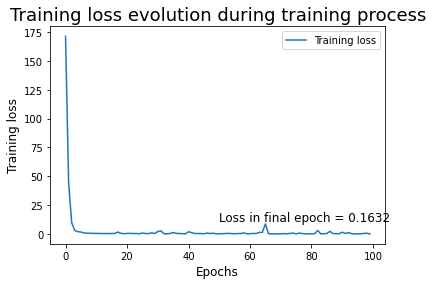

In [10]:
	plt.figure(3)
	l1 = plt.plot(epoch_list, train_loss_list, label = 'Training loss')
	plt.xlabel('Epochs',fontsize = 12)
	plt.ylabel('Training loss',fontsize = 12)
	plt.title('Training loss evolution during training process',color='black', fontsize = 18)
	plt.text(50, 20, 'Loss in final epoch = %.4f' % train_loss_list[-1],verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
	plt.legend(loc='best')

## Testing loss evolution during testing process

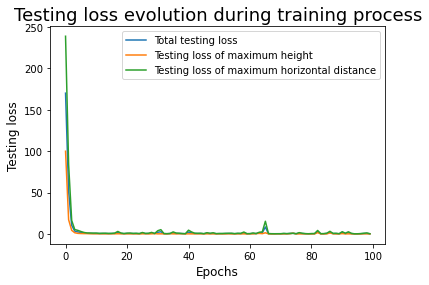

In [11]:
	plt.figure(4)
	l1 = plt.plot(epoch_list, test_loss_list, label = 'Total testing loss')
	l2 = plt.plot(epoch_list, h_loss_list, label = 'Testing loss of maximum height')
	l3 = plt.plot(epoch_list, d_loss_list, label = 'Testing loss of maximum horizontal distance')
	plt.xlabel('Epochs',fontsize = 12)
	plt.ylabel('Testing loss',fontsize = 12)
	plt.title('Testing loss evolution during training process',color='black', fontsize = 18)
	plt.legend(loc='best')
	plt.show()